In [2]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt



In [37]:
# Load the dataset into an xarray
def plot_tomcat_snow_depth(month_name):   
    month_arr = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    m_index = month_arr.index(month_name)
    
    ds = xr.open_dataset("tomcat_snow_depth_3.nc")

    #snow depth data 
    snow_depth = ds['snow_depth'].values[m_index,:,:]*100 # 0 is for January -- Winter

    # Extract the latitude and longitude arrays
    lat = ds['lat'].values
    lon = ds['lon'].values

    # Define the projection for the plot
    projection = ccrs.NorthPolarStereo(central_longitude=-45)

    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize = (12,10), subplot_kw={'projection': projection})

    # Plot the data using the pcolormesh method
    im = ax.pcolormesh(lon, lat, snow_depth, transform=ccrs.PlateCarree(), cmap='Reds')

    cbar = plt.colorbar(im, ax=ax)

    # Set the limits of the plot to only show the Arctic region
    ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

    # Add coastlines to the plot
    ax.coastlines()
    
    ax.set_title(f'Snow depth (cm) - {month_name}', fontsize = 22)
    cbar.ax.tick_params(labelsize=18)

    plt.show()
    



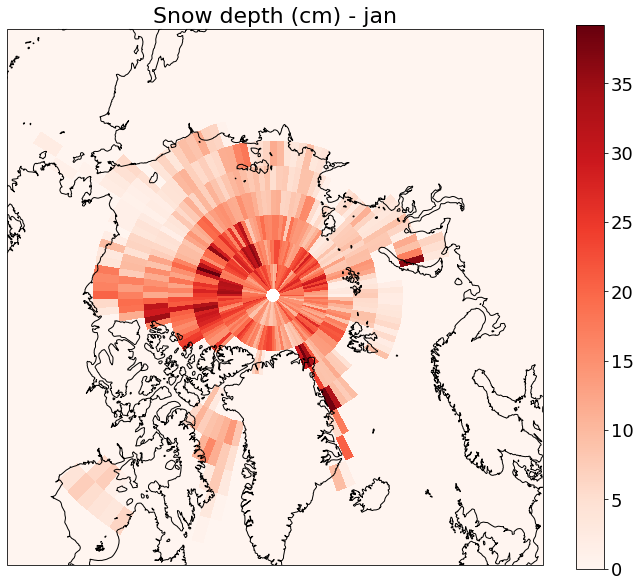

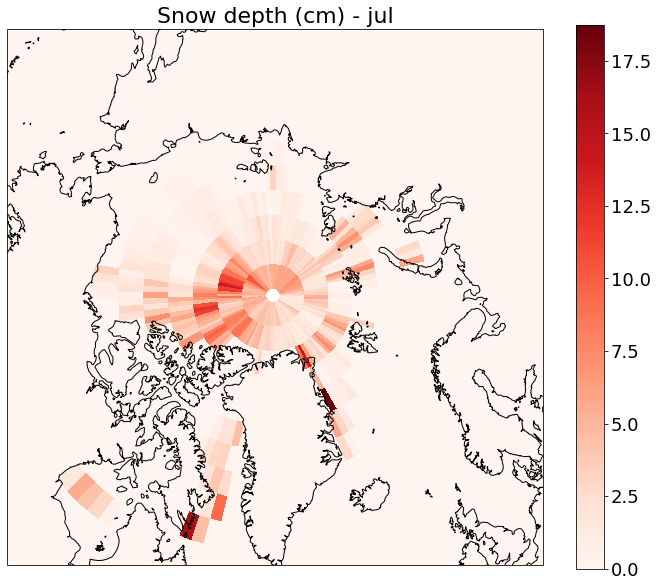

In [39]:
if __name__ == "__main__":
    plot_tomcat_snow_depth('jan')
    plot_tomcat_snow_depth('jul')

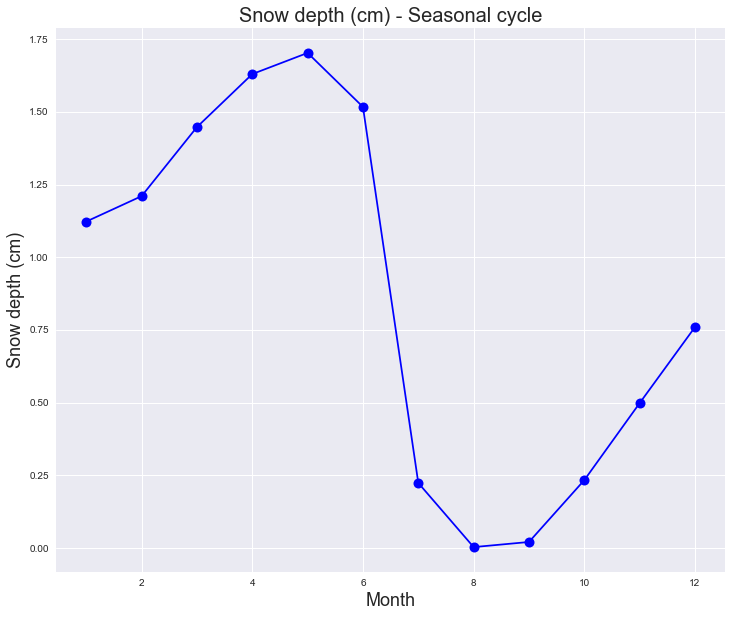

In [43]:
ds = xr.open_dataset("tomcat_snow_depth_3.nc")

#snow depth data 
snow_depth = ds['snow_depth'].values*100 # 0 is for January -- Winter and convert to cm

# Extract the latitude and longitude arrays
lat = ds['lat'].values
lon = ds['lon'].values

sd_tseries = np.array([])

for i in range(12):
    sd_mean = np.mean(snow_depth[i,:,:])
    sd_tseries = np.append(sd_tseries,sd_mean)

plt.figure(figsize=(12,10))
plt.style.use('seaborn')
plt.title('Snow depth (cm) - Seasonal cycle', fontsize = 20)
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Snow depth (cm)', fontsize = 18)
plt.plot(np.arange(1,13,1),sd_tseries,'b.-',markersize = 20)
plt.show()





In [8]:
ds['lat'].values

array([1.       , 1.0158731, 1.031746 , 1.0476191, 1.0634921, 1.0793651,
       1.0952381, 1.1111112, 1.1269841, 1.1428572, 1.1587301, 1.1746032,
       1.1904762, 1.2063493, 1.2222222, 1.2380953, 1.2539682, 1.2698413,
       1.2857143, 1.3015873, 1.3174603, 1.3333334, 1.3492063, 1.3650794,
       1.3809524, 1.3968254, 1.4126984, 1.4285715, 1.4444444, 1.4603175,
       1.4761904, 1.4920635, 1.5079365, 1.5238096, 1.5396825, 1.5555556,
       1.5714285, 1.5873016, 1.6031746, 1.6190476, 1.6349206, 1.6507937,
       1.6666666, 1.6825397, 1.6984127, 1.7142857, 1.7301587, 1.7460318,
       1.7619047, 1.7777778, 1.7936507, 1.8095238, 1.8253968, 1.8412699,
       1.8571428, 1.8730159, 1.8888888, 1.9047619, 1.9206349, 1.9365079,
       1.9523809, 1.968254 , 1.9841269, 2.       ], dtype=float32)